# Le tri fusion

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from random import randint
from listes import (cellule,
                    liste_vide, 
                    est_vide,
                    affiche_liste,
                    tête, queue, 
                    liste_chaînée)

## Les algorithmes de tri vus en Première

Pour vour rafraîchir la mémoire, le mieux est d'aller (re)lire le [cours de Première sur les algorithmes de tri](https://python-carnot.fr/nsi-premiere/algo_tri/cours).

### Le tri par insertion

In [3]:
def tri_insertion(t):
    """
    Trie le tableau 't' en place, dans l'ordre croissant.
    """

    cmp = 0
    for i in range(1, len(t)):
        j = i
        while j > 0 and t[j-1] > t[j]:
            t[j], t[j-1] = t[j-1], t[j]
            j -= 1

### Le tri par sélection

In [4]:
def tri_sélection(t):
    """
    Trie en place le tableau 't', dans l'ordre croissant. 
    """

    for i in range(0, len(t)):
        # On recherche la valeur minimale à partir de l'indice i
        for j in range(i + 1, len(t)):
            if t[j] < t[i]:
                t[i], t[j] = t[j], t[i]

## Le tri fusion

On rappelle que l'algorithme de tri fusion est implémenté à l'aide de trois fonctions:
* La fonction `coupe` qui découpe une liste (chaînée ou bien une liste python) en deux sous-listes de tailles égales (à un élément près si le nombre total d'éléments est impair). La manière dont le découpage est réalisé (soit découpage au milieu de la liste initiale, soit découpage en prenant un élément sur deux dans chaque sous-liste) n'a absolument aucune importance.
* La fonction `fusion` qui prend pour paramètre deux listes **triées** et les fusionne en une unique liste triée.
* La fonction `tri_fusion` qui est récursive, et réalise le tri à proprement parler en utilisant les deux fonctions précédentes:
  1. On commence par découper la liste que l'on cherche à trier en deux sous-listes;
  1. On trie récursivement ces deux sous-listes;
  1. On fusionne les deux sous-listes triées en une unique liste, qui est le résultat attendu.

### Fonction de découpage

In [5]:
def coupe(lc):
    """
    Prend pour paramètre une liste chaînée, et renvoie deux 
    sous-listes chaînées de tailles égales (éventuellement à 
    un élément près).
    """
    
    l1 = liste_vide()
    l2 = liste_vide()
    
    indice = 0
    pos = lc
    while not est_vide(pos):
        if indice % 2 == 0:
            l1 = cellule(tête(pos), l1)
        else:
            l2 = cellule(tête(pos), l2)
        
        indice += 1
        pos = queue(pos)
        
    return l1, l2

In [6]:
lc = liste_chaînée("Numérique")
l1, l2 = coupe(lc)
affiche_liste(l1)
affiche_liste(l2)

[e->q->r->m->N]
[u->i->é->u]


On constate que l'implémentation choisie ici utilise la méthode où l'on prend alternativement un élément sur deux pour chaque sous-liste. Comme on utilise des listes chaînées, les valeurs sont en outre insérées à l'envers. Mais cela n'a aucune importance pour l'algorithme de tri fusion: l'essentiel est que les éléments soient répartis entre les 2 sous-listes. Le fait que les sous-listes soient de tailles équivalentes garantit l'optimalité de la complexité de l'algorithme (il fonctionnerait même avec des sous-listes très déséquilibrées, mais son temps d'exécution serait plus long).

### Opération de fusion

Une première implémentation, récursive, très facile à comprendre. Elle n'est cependant pas intéressante en pratique, car fusionner 2 listes dont la taille dépasse 1000 déclencherait une erreur de dépassement de pile d'exécution, car le nombre d'appels récursifs serait trop important.

In [7]:
def fusion_rec(l1, l2):
    """
    Fusionne les 2 listes chaînées TRIÉES l1 et l2 en une
    liste chaînée TRIÉE.
    
    Version récursive.
    """
    
    if est_vide(l1):
        return l2
    elif est_vide(l2):
        return l1
    else:
        # Les 2 listes contiennent au moins un élément
        v1 = tête(l1)
        v2 = tête(l2)
        
        if v1 > v2:
            return cellule(v2, fusion_rec(l1, queue(l2)))
        else:
            return cellule(v2, fusion_rec(l1, queue(l2)))
            

In [8]:
l1 = liste_chaînée([1, 2, 3, 4, 5, 6])
l2 = liste_chaînée([1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
affiche_liste(fusion_rec(l1, l2))

[1.5->2.5->3.5->4.5->5.5->6.5->1->2->3->4->5->6]


Pour les raisons évoquées plus haut, on privilégie donc une implémentation itérative, dont la complexité est linéaire (le nombre d'opérations est égal à 2 fois la taille de la liste finale, parce qu'on doit aussi retourner la liste construite, ce qui est une nécessité puisque l'on utilise des listes chaînées). 

In [9]:
def fusion(l1, l2):
    """
    Fusionne les 2 listes chaînées TRIÉES l1 et l2 en une
    liste chaînée TRIÉE.
    
    Version itérative
    """
    
    lc = liste_vide()
    
    # On boucle tant qu'une au moins des 2 listes n'est pas vide
    while not (est_vide(l1) and est_vide(l2)):
        if est_vide(l1):
            # l1 est vide: on rajoute tous les éléments de l2
            while not est_vide(l2):
                lc = cellule(tête(l2), lc)
                l2 = queue(l2)
        elif est_vide(l2):
            # l2 est vide: on rajoute tous les éléments de l1
            while not est_vide(l1):
                lc = cellule(tête(l1), lc)
                l1 = queue(l1)
        else:
            # l1 et l2 contiennent au moins un élément chacune
            v1 = tête(l1)
            v2 = tête(l2)
            if v1 > v2:
                lc = cellule(v2, lc)
                l2 = queue(l2)
            else:
                lc = cellule(v1, lc)
                l1 = queue(l1)

    # La liste lc est la fusion de l1 et l2, mais les éléments ont été placés à l'envers
    # On retourne donc cette liste.
    # On aurait pu utiliser une Pile à la place de lc pour obtenir le même effet
    #
    # Cela double le nombre d'opérations à effectuer (et donc la complexité), mais néanmoins
    # celle-ci reste linéaire: linéaire signifie simplement que le nombre d'opérations est
    # proportionnel à la taille des données, un coefficient 2 ne change fondamentalement pas
    # grand chose. On verra qu'il est possible de se débarasser de cette inversion, par exemple
    # en utilisant des listes python (voir exercice un peu plus loin).
    
    lc2 = liste_vide()
    while not est_vide(lc):
        lc2 = cellule(tête(lc), lc2)
        lc = queue(lc)
        
    return lc2

In [10]:
l1 = liste_chaînée([1, 2, 3, 4, 5, 6])
l2 = liste_chaînée([1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
affiche_liste(fusion(l1, l2))

[1->1.5->2->2.5->3->3.5->4->4.5->5->5.5->6->6.5]


### Algorithme de tri fusion: implémentation

L'implémentation ci-dessous suit au plus près l'algorithme décrit un peu plus haut: elle est donc très simple à comprendre. Cette simplicité est due au fait d'avoir utilisé deux fonctions `coupe` et `fusion` qui rendent la lecture de la fonction `tri_fusion` **beaucoup** plus simple. Essayez d'incorporer le code de ces deux fonctions directement dans la fonction `tri_fusion` pour apprécier la différence.

In [11]:
def tri_fusion(lc):
    """
    Trie la liste chaînée lc selon l'algorithme de tri fusion.
    
    Renvoie une copie triée de la liste initiale.
    """
    if est_vide(lc):
        return lc
    elif est_vide(queue(lc)):
        # La liste est soit vide, soit constituée d'un seul élément
        return lc
    else:
        l1, l2 = coupe(lc)
        l1t = tri_fusion(l1)
        l2t = tri_fusion(l2)
        return fusion(l1t, l2t)

In [12]:
N = 100
lc = liste_chaînée([randint(0, 1000) for _ in range(N)])
lct = tri_fusion(lc)
print("Liste initiale:")
affiche_liste(lc)
print()
print("Liste triée:")
affiche_liste(lct)

Liste initiale:
[23->201->461->985->710->437->171->658->510->665->20->159->575->116->540->304->161->654->704->964->970->240->713->38->169->297->195->758->82->660->214->991->569->755->141->24->312->699->380->435->952->277->536->540->739->866->294->973->685->977->162->710->391->161->252->153->860->481->492->400->180->15->415->78->769->18->862->666->851->30->815->529->296->625->958->974->395->436->130->607->715->971->111->858->561->308->691->727->50->823->454->384->972->186->847->155->656->219->1->343]

Liste triée:
[1->15->18->20->23->24->30->38->50->78->82->111->116->130->141->153->155->159->161->161->162->169->171->180->186->195->201->214->219->240->252->277->294->296->297->304->308->312->343->380->384->391->395->400->415->435->436->437->454->461->481->492->510->529->536->540->540->561->569->575->607->625->654->656->658->660->665->666->685->691->699->704->710->710->713->715->727->739->755->758->769->815->823->847->851->858->860->862->866->952->958->964->970->971->972->973->974->977->98

---

## Tri fusion avec des listes python

Implémentez les fonction `coupe`, `fusion` et `tri_fusion` afin qu'elles utilisent des listes python en lieu et place des listes chaînées.

#### Fonction `coupe_py`

> **Note:** afin de pouvoir disposer des deux implémentations (avec listes chaînées et avec listes python) pour effectuer des comparaisons ultérieures, on va rajouter le suffixe `_py` lorsque la fonction utilise des listes python.

Voici une première implémentation, ressemblant à s'y méprendre à celle avec les listes chaînées:

In [13]:
def coupe_py(liste):
    """
    Découpe la liste (python) en deux sous-listes de tailles égales (à un élément près). 
    
    Renvoie les deux sous-listes.
    """

    l1 = []
    l2 = []
    
    for i in range(len(liste)):
        if i % 2 == 0:
            l1.append(liste[i])
        else:
            l2.append(liste[i])
            
    return l1, l2

On peut cependant utiliser un mécanisme (hors programme en NSI) très puissant pour découper des listes en python, les **tranches** (slices).

* En python, la syntaxe `liste[a:b]` renvoie la sous-liste de `liste` comportant tous les éléments à partir de l'indice `a` (inclu) jusqu'à l'indice `b` (exclu).
* Cas particulier: `liste[:b]` renvoie tous les éléments dont l'indice est strictement inférieur à `b`;
* Autre cas particulier: `liste[a:]` renvoie tous les éléments dont l'indice est supérieur ou égal à `a`;

```python
>>> "Numérique"[2:6]
"méri"
>>> "Numérique"[:5]
"Numér"
>>> "Numérique"[5:]
"ique"
```

Voici comment on peut s'en servir pour découper nos listes sans avoir à utiliser une boucle python. Notons que le découpage se fait ici au milieu de la liste initiale, et non pas en prenant un élément sur deux comme pour l'algorithme précédent ou bien l'implémentation avec des listes chaînées. Encore une fois, cela n'a aucune influence sur le résultat (ou les performances) du tri fusion.

In [14]:
def coupe_py(liste):
    """
    Découpe la liste (python) en deux sous-listes de tailles égales (à un élément près). 
    
    Renvoie les deux sous-listes.
    """
    
    milieu = len(liste) // 2
    
    l1 = liste[:milieu] # tous les éléments avant l'indice milieu (exclu)
    l2 = liste[milieu:] # tous les éléments à partir de milieu (inclu)
    
    return l1, l2

In [15]:
coupe_py("anticonstitutionnellement")

('anticonstitu', 'tionnellement')

#### Implémentation de `fusion_py`

Il n'y a pas de moyen _«pythonesque»_ simple pour fusionner deux listes, on va procéder à peu près comme pour les listes chaînées, à la différence que la liste fusionnée sera construite directement dans le bon sens, ce qui nous épargnera la nécessité de la retourner.

In [16]:
def fusion_py(l1, l2):
    """
    Fusionne les deux listes TRIÉES l1 et l2 en une unique liste triée.
    """
    
    N1 = len(l1)
    N2 = len(l2)
    
    liste = []
    i1 = 0
    i2 = 0
    while i1 < N1 or i2 < N2: # tant qu'il reste des éléments à traiter dans au moins l'une des 2 listes
        if i1 == N1:
            # La première liste est déjà épuisée: on peut donc traiter exclusivement la deuxième
            while i2 < N2:
                liste.append(l2[i2])
                i2 += 1
        elif i2 == N2:
            # La deuxième liste est déjà épuisée: on peut donc traiter exclusivement la première
            while i1 < N1:
                liste.append(l1[i1])
                i1 += 1
        else:
            # Il reste des éléments à traiter dans chacune des 2 listes: on garde le plus petit des 2
            if l1[i1] < l2[i2]:
                liste.append(l1[i1])
                i1 += 1
            else:
                liste.append(l2[i2])
                i2 += 1
    
    return liste

In [17]:
repr(fusion_py("acegikrst", "bdfhjlmopq"))

"['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'o', 'p', 'q', 'r', 's', 't']"

#### Implémentation de `tri_fusion_py`

In [18]:
def tri_fusion_py(liste):
    """
    Renvoie une copie triée de `liste`.
    """
    
    # Une liste de longueur 0 ou 1 est déjà triée: il n'y a rien à faire
    if len(liste) == 0:
        return []
    elif len(liste) == 1:
        return [liste[0]] # On doit renvoyer une *copie* de liste, pas la liste elle-même.
    else:
        l1, l2 = coupe_py(liste)
        lt1 = tri_fusion_py(l1)
        lt2 = tri_fusion_py(l2)
        
        return fusion_py(lt1, lt2)

In [19]:
repr(tri_fusion_py("anticonstitutionnellement"))

"['a', 'c', 'e', 'e', 'e', 'i', 'i', 'i', 'l', 'l', 'm', 'n', 'n', 'n', 'n', 'n', 'o', 'o', 's', 't', 't', 't', 't', 't', 'u']"

### Complément: comparaison entre les deux implémentations du tri fusion

On a à présent deux implémentations différentes du tri fusion: l'une utilise des listes chaînées, l'autre des listes python. La complexité des deux algorithmes est rigousement la même: elle est proportionnelle à $N\times \log_2(N)$, où $N$ est la taille de la liste.

Cependant, la complexité seule ne permet pas d'apprécier le temps d'exécution d'un algorithme: le choix des détails de l'implémentation peut changer de manière conséquente le _coefficient de proportionnalité_. Est-ce le cas ici ?

On propose de mesurer les performances des 2 implémentations sur une même liste aléatoire (de taille conséquente). Afin d'apprécier néanmoins la complexité en $N\times\log_2(N)$, on effectue aussi un tri en utilisant un des deux algorithmes de Première (qui ont tous les deux une complexité **quadratique** en $N^2$).

**Attention:** Le temps d'exécution pour le tri par insertion est **très long**, soyez patients (plus ou moins selon la puissance de votre ordinateur). Il n'y a pas de bug dans l'algorithme (avec une boucle infinie).

C'est tout à fait normal: le nombre d'opérations est proportionnel à $25000^2 = 625000000$, soit $625$ millions de comparaisons. C'est un nombre énorme pour un langage comme python qui n'est guère optimisé pour les calculs intensifs. On voit ici toute l'importance de choisir des algorithmes avec une complexité adaptée aux données massives. **Le choix de l'algorithme est bien plus déterminant que la vitesse intrinsèque du langage de programmation utilisé".

Sur mon ordinateur, le tri par insertion sur un tableau de taille 25000 prend environ 1 minute (contre moins de 1s pour le tri fusion avec listes chainées, et environ 15 dixièmes de secondes pour le tri fusion avec listes python). Passer à 100000 éléments (ce qui revient à multiplier la taille des données par 4) revient à multiplier le temps d"exécution par $4^2 = 16$, soit environ 1/4h. Si vous en avez le courage, essayez !

In [20]:
from time import time

N = 25000
liste = [randint(-N, N) for _ in range(N)]

# Listes chaînées
lc = liste_chaînée(liste)
début = time()
tri_fusion(lc)
fin = time()
print("Temps d'exécution pour {} éléments avec des listes chaînées: {} secondes".format(N, fin-début))

# Listes python
début = time()
tri_fusion_py(liste)
fin = time()
print("Temps d'exécution pour {} éléments avec des listes python: {} secondes".format(N, fin-début))

# Tri par insertion
début = time()
tri_insertion(liste)
fin = time()
print("Temps d'exécution pour {} éléments avec un tri par insertion: {} secondes".format(N, fin-début))

Temps d'exécution pour 25000 éléments avec des listes chaînées: 0.686295747756958 secondes
Temps d'exécution pour 25000 éléments avec des listes python: 0.10176610946655273 secondes
Temps d'exécution pour 25000 éléments avec un tri par insertion: 47.11772274971008 secondes


---

## Comptage du nombre d'opérations pour un tri fusion

* Modifiez l'implémentation de la fonction `tri_fusion` précédente afin qu'elle renvoie, outre la liste triée, le nombre total de comparaisons effectuées.
* Modifiez les implémentations des fonctions `tri_insertion` et `tri_sélection` pour qu'ils renvoient le nombre de comparaisons effectués.

Comparez ensuite les nombres obtenus sur des listes aléatoires dont les tailles vont croissant. Représentez ces résultats à l'aide de matplotlib.

In [21]:
def tri_insertion(t):
    """
    Trie le tableau 't' en place, dans l'ordre croissant.
    
    Renvoie le nombre de comparaisons effectuées.
    """

    compteur = 0
    for i in range(1, len(t)):
        j = i
        while j > 0 and t[j-1] > t[j]:
            t[j], t[j-1] = t[j-1], t[j]
            j -= 1
            compteur += 1
            
    return compteur

In [22]:
def tri_sélection(t):
    """
    Trie en place le tableau 't', dans l'ordre croissant.
    
    Renvoie le nombre de comparaisons effectué.
    """

    compteur = 0
    for i in range(0, len(t)):
        # On recherche la valeur minimale à partir de l'indice i
        for j in range(i + 1, len(t)):
            compteur += 1
            if t[j] < t[i]:
                t[i], t[j] = t[j], t[i]
                
    return compteur

In [23]:
def tri_fusion_py(liste):
    """
    Renvoie une copie triée de `liste`, ainsi que le nombre de comparaisons effectuées.
    """
    
    # Une liste de longueur 0 ou 1 est déjà triée: il n'y a rien à faire
    if len(liste) == 0:
        return [], 0
    elif len(liste) == 1:
        return [liste[0]], 1 # On doit renvoyer une *copie* de liste, pas la liste elle-même.
    else:
        l1, l2 = coupe_py(liste)
        lt1, n1 = tri_fusion_py(l1)
        lt2, n2 = tri_fusion_py(l2)
        
        # Le nombre de comparaisons effectuées est égal à n1 + n2 (nombre de comparaisons pour le tri
        # fusion de chacune des sous-listes), plus les n comparaisons occasionnées par la fusion, où
        # n == len(liste).
        return fusion_py(lt1, lt2), len(liste) + n1 + n2

In [24]:
N = 10000
t = [randint(-N, N) for _ in range(N)]
n1 = tri_insertion(t[:]) # La syntaxe spéciale [:] permet d'obtenir une copie du tableau t
n2 = tri_sélection(t[:])
_, n3 = tri_fusion_py(t)

print("Tri de {} éléments:".format(N))
print("Tri insertion -> {} comparaisons".format(n1))
print("Tri sélection -> {} comparaisons".format(n2))
print("Tri fusion -> {} comparaisons".format(n3))

Tri de 10000 éléments:
Tri insertion -> 25221079 comparaisons
Tri sélection -> 49995000 comparaisons
Tri fusion -> 143616 comparaisons


On constate que le tri par insertion utilise en moyenne deux fois moins de comparaisons que le tri par sélection. C'est en fait tout à fait normal:
* Le tri par sélection utilise deux boucles `for` dont le nombre d'étapes ne change jamais. Le calcul théorique pour une liste de taille $N$ est
$$
1 + 2 + 3 + \cdots + N-1 = N(N-1)2 = 4999500
$$
* Le tri par insertion a la même complexité quadratique, mais l'insertion d'un élément peut s'arrêter plus tôt (selon la valeur de cet élément... relisez le cours de Première qui donne tous les détails). Le nombre effectif de comparaisons est donc en général plus court. On constate expérimentalement que c'est en moyenne la moitié.
* Le calcul théorique pour le tri fusion donne $10000\times\log_2(10000) \approx 132000$, ce qui est proche du résultat obtenu exoérimentalement. La formule donnant la complexité d'un algorithme ne donne jamais le nombre **exact** de comparaisons (ou d'opérations élémentaires), juste un ordre de grandeur.

#### Représentation graphique

Utilisons la librairie `matplotlib` pour afficher les courbes de complexités entre le tri par sélection et le tri fusion.

In [25]:
from matplotlib import pyplot as plt

xs = [] # Les abscisses
y1s = [] # valeurs pour le tri par sélection
y2s = [] # valeurs pour le tri fusion

for N in range(10, 1001, 10): # De 10 à 1000 par pas de 10
    xs.append(N)
    t = [randint(-N, N) for _ in range(N)]
    _ , n = tri_fusion_py(t)
    y2s.append(n)
    n = tri_sélection(t)
    y1s.append(n)

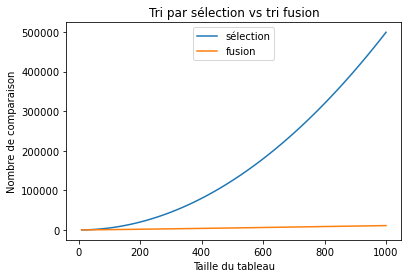

In [26]:
plt.plot(xs, y1s, label="sélection")
plt.plot(xs, y2s, label="fusion")
plt.legend(loc=9) # loc=9 -> top center
plt.title("Tri par sélection vs tri fusion")
plt.ylabel("Nombre de comparaison")
plt.xlabel("Taille du tableau")

plt.show()

L'écrasante supériorité d'un algorithme en $N\times\log_2(N)$ par rapport à un algorithme en $N^2$ est ici flagrante. On aurait pu obtenir des courbes similaires en traçant les complexités théoriques

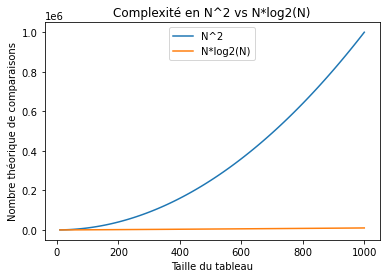

In [27]:
from matplotlib import pyplot as plt
from math import log2

xs = [] # Les abscisses
y1s = [] # valeurs pour le tri par sélection
y2s = [] # valeurs pour le tri fusion

for N in range(10, 1001, 10): # De 10 à 1000 par pas de 10
    xs.append(N)
    y1s.append(N**2)
    y2s.append(N*log2(N))

plt.plot(xs, y1s, label="N^2")
plt.plot(xs, y2s, label="N*log2(N)")
plt.legend(loc=9) # loc=9 -> top center
plt.title("Complexité en N^2 vs N*log2(N)")
plt.ylabel("Nombre théorique de comparaisons")
plt.xlabel("Taille du tableau")

plt.show()

---

## Tri fusion dans l'ordre décroissant

Comment modifier l'implémentation du tri fusion afin que le tri se fasse dans l'ordre décroissant ?

Proposez une implémentation permettant d'utiliser un paramètre optionnel `croissant=True` (voir exercice suivant pour plus de détails dans le cas du tri par sélection).

**Point important:** On doit évidemment rajouter le paramètre optionnel `croissant` à la fonction `tri_fusion_py`, puisque c'est celle-ci qui est appelée par l'utilisateur.

Cependant, c'est dans la fonction de fusion que les comparaisons sont effectuées: il faut donc aussi incorporer ce paramètre optionnel à celle-ci.

Par contre, la fonction `coupe` ne tient pas compte de l'ordre de tri: elle n'a donc pas besoin d'être altérée.

In [28]:
def fusion_py(l1, l2, croissant=True):
    """
    Fusionne les deux listes TRIÉES l1 et l2 en une unique liste triée.
    
    Le paramètre optionnel croissant (un booléen) précise l'ordre du tri.
    """
    
    N1 = len(l1)
    N2 = len(l2)
    
    liste = []
    i1 = 0
    i2 = 0
    while i1 < N1 or i2 < N2: # tant qu'il reste des éléments à traiter dans au moins l'une des 2 listes
        if i1 == N1:
            # La première liste est déjà épuisée: on peut donc traiter exclusivement la deuxième
            while i2 < N2:
                liste.append(l2[i2])
                i2 += 1
        elif i2 == N2:
            # La deuxième liste est déjà épuisée: on peut donc traiter exclusivement la première
            while i1 < N1:
                liste.append(l1[i1])
                i1 += 1
        else:
            # Il reste des éléments à traiter dans chacune des 2 listes: on garde le plus petit des 2
            if (croissant == True and l1[i1] < l2[i2]) or (croissant == False and l1[i1] > l2[i2]):
                liste.append(l1[i1])
                i1 += 1
            else:
                liste.append(l2[i2])
                i2 += 1
    
    return liste

In [29]:
def tri_fusion_py(liste, croissant=True):
    """
    Renvoie une copie triée de `liste`.
    
    Le booléen croissant précise l'ordre du tri.
    """
    
    # Une liste de longueur 0 ou 1 est déjà triée: il n'y a rien à faire
    if len(liste) == 0:
        return []
    elif len(liste) == 1:
        return [liste[0]] # On doit renvoyer une *copie* de liste, pas la liste elle-même.
    else:
        l1, l2 = coupe_py(liste)
        lt1 = tri_fusion_py(l1, croissant)
        lt2 = tri_fusion_py(l2, croissant)
        
        return fusion_py(lt1, lt2, croissant)

In [30]:
print("".join(tri_fusion_py("assimilation")))
print("".join(tri_fusion_py("assimilation", croissant=True)))
print("".join(tri_fusion_py("assimilation", croissant=False)))

aaiiilmnosst
aaiiilmnosst
tssonmliiiaa


* Dans le premier tri, le paramètre `croissant` est omis: sa valeur par défaut (`True`) est donc utilisée. 
* Pour les deux tris suivants, on trie une fois dans l'ordre croissant, une fois dans l'ordre décroissant.

---
## Tri fusion avec une fonction calculant la clé de comparaison

On redonne ici une implémentation du tri par sélection (étudiée en Première) contenant deux paramètres optionnels supplémentaires:
* `croissant` est un booléen spécifiant si le tri doit se faire dans l'ordre croissant (par défaut) ou décroissant;
* `clé_de_comparaison` est soit `None` (par défaut), soit une fonction prenant pour valeur un des éléments du tableau à trier, et renvoyant une valeur qui servira pour la comparaison.

In [31]:
def tri_sélection(t, croissant=True, clé_de_comparaison=None):
    """Trie le tableau t.
    
    Le paramètre optionnel croissant est un booléen indiquant s'il faut trier dans l'ordre
    croissant ou non. Par défaut (si le paramètre n'est pas inclus), le tri se fera dans
    l'ordre croissant.
    
    Le paramètre optionnel clé_de_comparaison doit être None (s'il n'y en a pas) ou bien une fonction
    renvoyant une valeur qui servira à la comparaison des données. En cas d'absence 
    (c'est-à-dire si clé_de_comparaison == None), l'ordre lexicographique standard sera utilisé
    """
    
    for i in range(len(t)):
        if clé_de_comparaison is None:
            m = t[i]
        else:
            m = clé_de_comparaison(t[i])
        indice_m = i
        for j in range(i + 1, len(t)):
            # Selon la valeur de croissant, il faut tester une inégalité ou l'autre: selon le cas,
            # on recherchera donc le minimum (si croissant est True) ou le maximum sur
            # la partie non triée
            if clé_de_comparaison is None:
                valeur = t[j]
            else:
                valeur = clé_de_comparaison(t[j])
            if (croissant is True and valeur < m) or (croissant is False and valeur > m):
                m = valeur
                indice_m = j
        t[i], t[indice_m] = t[indice_m], t[i]

Inspirez-vous de cette fonction pour faire la même chose pour le tri fusion.

Il faut notamment réfléchir à laquelle ou lesquelles des trois fonctions `coupe`, `fusion` et `tri_fusion` devront être modifiées pour incorporer les nouveaux paramètres `croissant` et `clé_de_comparaison`.

In [32]:
def fusion_py(l1, l2, croissant=True, clé_de_comparaison=None):
    """
    Fusionne les deux listes TRIÉES l1 et l2 en une unique liste triée.
    
    Le paramètre optionnel croissant (un booléen) précise l'ordre du tri.
    Le paramètre optionnel clé_de_comparaison peut être None (ce qui donne une comparaison
    par défaut suivant l'ordre lexicogaphique), ou alors est une fonction permettant de calculer
    les valeurs qui serviront aux comparaisons.
    """
    
    N1 = len(l1)
    N2 = len(l2)
    
    liste = []
    i1 = 0
    i2 = 0
    while i1 < N1 or i2 < N2: # tant qu'il reste des éléments à traiter dans au moins l'une des 2 listes
        if i1 == N1:
            # La première liste est déjà épuisée: on peut donc traiter exclusivement la deuxième
            while i2 < N2:
                liste.append(l2[i2])
                i2 += 1
        elif i2 == N2:
            # La deuxième liste est déjà épuisée: on peut donc traiter exclusivement la première
            while i1 < N1:
                liste.append(l1[i1])
                i1 += 1
        else:
            # Il reste des éléments à traiter dans chacune des 2 listes: on garde le plus petit des 2
            
            # S'il n'y a pas de fonction clé_de_comparaison, on récupère les valeurs brutes depuis le tableau
            # Sinon, on les transforme à l'aide de la fonction fournie.
            if clé_de_comparaison is None:
                v1 = l1[i1]
                v2 = l2[i2]
            else:
                v1 = clé_de_comparaison(l1[i1])
                v2 = clé_de_comparaison(l2[i2])
                
            if (croissant == True and v1 < v2) or (croissant == False and v1 > v2):
                liste.append(l1[i1])
                i1 += 1
            else:
                liste.append(l2[i2])
                i2 += 1
    
    return liste

In [33]:
def tri_fusion_py(liste, croissant=True, clé_de_comparaison=None):
    """
    Renvoie une copie triée de `liste`.
    
    Le booléen croissant précise l'ordre du tri.
    """
    
    # Une liste de longueur 0 ou 1 est déjà triée: il n'y a rien à faire
    if len(liste) == 0:
        return []
    elif len(liste) == 1:
        return [liste[0]] # On doit renvoyer une *copie* de liste, pas la liste elle-même.
    else:
        l1, l2 = coupe_py(liste)
        lt1 = tri_fusion_py(l1, croissant, clé_de_comparaison)
        lt2 = tri_fusion_py(l2, croissant, clé_de_comparaison)
        
        return fusion_py(lt1, lt2, croissant, clé_de_comparaison)

Les deux exercices suivants donnent des applications classiques de cette nouvelle implémentation.

---

## Tri sur des tuples

Trier des listes de nombres est certes utile, mais la plupart du temps on a besoin de trier des données plus complexes. 

Voyons déjà le cas des tuples.

On a vu en première que, par défaut, les tuples sont comparés suivant l'ordre lexicographique: la première composante servira de clé de tri principal. En cas d'égalité de cette première composante, c'est la deuxième qui servira aux comparaisons. En cas d'égalité des deux premières, la troisième, etc...

In [34]:
def crée_liste_élèves(taille):
    prénoms = [
        "Théo", "Quentin", "Maxime", "Jules", "Gaspard", 
        "Valentin", "Mickaël", "Julien", "Maxens", "Gabin",
        "Perrine", "Zoé", "Séraphine", "Sophie", "Claire",
        "Amandine", "Julia", "Julie", "Céline", "Célia"
    ]

    noms = [
        "Legoff", "Dupont", "Dupuis", "Dubois", "Legrand",
        "Ledouble", "Duchemin", "Valois", "Fresnet", "Galois"
    ]

    classes = ["T1", "T2", "T3", "T4", "T5"]

    from random import choice
    def élève_aléatoire():
        return choice(prénoms), choice(noms), choice(classes)

    liste_élèves = [élève_aléatoire() for _ in range(taille)]
    return liste_élèves

In [35]:
liste_élèves = crée_liste_élèves(30)
liste_élèves

[('Quentin', 'Fresnet', 'T3'),
 ('Julia', 'Ledouble', 'T1'),
 ('Julie', 'Legoff', 'T5'),
 ('Claire', 'Duchemin', 'T1'),
 ('Céline', 'Dubois', 'T4'),
 ('Julien', 'Legrand', 'T2'),
 ('Amandine', 'Dubois', 'T2'),
 ('Quentin', 'Legoff', 'T4'),
 ('Gabin', 'Dupuis', 'T4'),
 ('Maxime', 'Fresnet', 'T4'),
 ('Gabin', 'Ledouble', 'T4'),
 ('Gabin', 'Ledouble', 'T2'),
 ('Mickaël', 'Valois', 'T1'),
 ('Céline', 'Dupont', 'T3'),
 ('Julia', 'Ledouble', 'T1'),
 ('Julia', 'Duchemin', 'T5'),
 ('Julien', 'Duchemin', 'T4'),
 ('Sophie', 'Legrand', 'T2'),
 ('Célia', 'Fresnet', 'T1'),
 ('Maxime', 'Legrand', 'T2'),
 ('Julien', 'Ledouble', 'T5'),
 ('Zoé', 'Duchemin', 'T4'),
 ('Maxime', 'Duchemin', 'T1'),
 ('Théo', 'Dubois', 'T2'),
 ('Séraphine', 'Galois', 'T5'),
 ('Perrine', 'Legrand', 'T2'),
 ('Jules', 'Ledouble', 'T4'),
 ('Quentin', 'Duchemin', 'T1'),
 ('Jules', 'Dupuis', 'T4'),
 ('Gaspard', 'Legoff', 'T4')]

Malheureusement pour nous (mais c'est fait exprès ici), l'ordre des composantes n'est pas le bon: on a ici en premier le prénom, suivi du nom, suivi de la classe. Nous souhaitons trier d'abord suivant la classe, puis de manière classique par rapport au nom, et seulement en dernier par rapport au prénom, en cas d'égalité des deux premières composantes.

Triez la liste précédente par classe, puis selon le nom, et enfin selon le prénom.

Si on ne donne pas de fonction pour la comparaison, le tri ne se fait effectivement pas dans l'ordre souhaité:

In [36]:
tri_fusion_py(liste_élèves)

[('Amandine', 'Dubois', 'T2'),
 ('Claire', 'Duchemin', 'T1'),
 ('Célia', 'Fresnet', 'T1'),
 ('Céline', 'Dubois', 'T4'),
 ('Céline', 'Dupont', 'T3'),
 ('Gabin', 'Dupuis', 'T4'),
 ('Gabin', 'Ledouble', 'T2'),
 ('Gabin', 'Ledouble', 'T4'),
 ('Gaspard', 'Legoff', 'T4'),
 ('Jules', 'Dupuis', 'T4'),
 ('Jules', 'Ledouble', 'T4'),
 ('Julia', 'Duchemin', 'T5'),
 ('Julia', 'Ledouble', 'T1'),
 ('Julia', 'Ledouble', 'T1'),
 ('Julie', 'Legoff', 'T5'),
 ('Julien', 'Duchemin', 'T4'),
 ('Julien', 'Ledouble', 'T5'),
 ('Julien', 'Legrand', 'T2'),
 ('Maxime', 'Duchemin', 'T1'),
 ('Maxime', 'Fresnet', 'T4'),
 ('Maxime', 'Legrand', 'T2'),
 ('Mickaël', 'Valois', 'T1'),
 ('Perrine', 'Legrand', 'T2'),
 ('Quentin', 'Duchemin', 'T1'),
 ('Quentin', 'Fresnet', 'T3'),
 ('Quentin', 'Legoff', 'T4'),
 ('Sophie', 'Legrand', 'T2'),
 ('Séraphine', 'Galois', 'T5'),
 ('Théo', 'Dubois', 'T2'),
 ('Zoé', 'Duchemin', 'T4')]

Voyons l'intérêt du paramètre `clé_de_comparaison`:

In [37]:
def ordonne(élève):
    prénom, nom, classe = élève
    return (classe, nom, prénom)

In [38]:
print("Tuple initial:", liste_élèves[0])
print("Tuple réordonné:", ordonne(liste_élèves[0]))

Tuple initial: ('Quentin', 'Fresnet', 'T3')
Tuple réordonné: ('T3', 'Fresnet', 'Quentin')


Puis le tri proprement dit:

In [39]:
tri_fusion_py(liste_élèves, clé_de_comparaison=ordonne)

[('Claire', 'Duchemin', 'T1'),
 ('Maxime', 'Duchemin', 'T1'),
 ('Quentin', 'Duchemin', 'T1'),
 ('Célia', 'Fresnet', 'T1'),
 ('Julia', 'Ledouble', 'T1'),
 ('Julia', 'Ledouble', 'T1'),
 ('Mickaël', 'Valois', 'T1'),
 ('Amandine', 'Dubois', 'T2'),
 ('Théo', 'Dubois', 'T2'),
 ('Gabin', 'Ledouble', 'T2'),
 ('Julien', 'Legrand', 'T2'),
 ('Maxime', 'Legrand', 'T2'),
 ('Perrine', 'Legrand', 'T2'),
 ('Sophie', 'Legrand', 'T2'),
 ('Céline', 'Dupont', 'T3'),
 ('Quentin', 'Fresnet', 'T3'),
 ('Céline', 'Dubois', 'T4'),
 ('Julien', 'Duchemin', 'T4'),
 ('Zoé', 'Duchemin', 'T4'),
 ('Gabin', 'Dupuis', 'T4'),
 ('Jules', 'Dupuis', 'T4'),
 ('Maxime', 'Fresnet', 'T4'),
 ('Gabin', 'Ledouble', 'T4'),
 ('Jules', 'Ledouble', 'T4'),
 ('Gaspard', 'Legoff', 'T4'),
 ('Quentin', 'Legoff', 'T4'),
 ('Julia', 'Duchemin', 'T5'),
 ('Séraphine', 'Galois', 'T5'),
 ('Julien', 'Ledouble', 'T5'),
 ('Julie', 'Legoff', 'T5')]

Les tuples réordonnés ont bien été utilisés pour trier les données, mais la liste triée contient néanmoins les tuples initiaux, comme souhaité.

---
## Tri sur des dictionnaires

Dans certaines situations (ce sera notamment le cas pour l'exercice suivant, basé sur des données réelles), chaque élément de notre tableau sera un **dictionnaire**. On rappelle que, puisque l'ordre des éléments d'un dictionnaire n'est pas garanti par python, il n'est pas possible de les comparer entre eux. On dit que le type `dictionnaire` de python n'est **pas ordonné**.

In [40]:
def crée_liste_élèves_dico(taille):
    prénoms = [
        "Théo", "Quentin", "Maxime", "Jules", "Gaspard", 
        "Valentin", "Mickaël", "Julien", "Maxens", "Gabin",
        "Perrine", "Zoé", "Séraphine", "Sophie", "Claire",
        "Amandine", "Julia", "Julie", "Céline", "Célia"
    ]

    noms = [
        "Legoff", "Dupont", "Dupuis", "Dubois", "Legrand",
        "Ledouble", "Duchemin", "Valois", "Fresnet", "Galois"
    ]

    classes = ["T1", "T2", "T3"]

    from random import choice
    def élève_aléatoire():
        return {
                    "prénom": choice(prénoms), 
                    "nom": choice(noms),
                    "classe": choice(classes)
               }
    

    liste_élèves = [élève_aléatoire() for _ in range(taille)]
    return liste_élèves

In [41]:
liste_élèves = crée_liste_élèves_dico(30)
liste_élèves

[{'prénom': 'Julien', 'nom': 'Galois', 'classe': 'T1'},
 {'prénom': 'Célia', 'nom': 'Valois', 'classe': 'T1'},
 {'prénom': 'Gabin', 'nom': 'Dupont', 'classe': 'T2'},
 {'prénom': 'Théo', 'nom': 'Legoff', 'classe': 'T2'},
 {'prénom': 'Julien', 'nom': 'Legoff', 'classe': 'T2'},
 {'prénom': 'Séraphine', 'nom': 'Dubois', 'classe': 'T3'},
 {'prénom': 'Perrine', 'nom': 'Legoff', 'classe': 'T1'},
 {'prénom': 'Gabin', 'nom': 'Dubois', 'classe': 'T2'},
 {'prénom': 'Céline', 'nom': 'Dupont', 'classe': 'T2'},
 {'prénom': 'Céline', 'nom': 'Galois', 'classe': 'T1'},
 {'prénom': 'Maxens', 'nom': 'Dupont', 'classe': 'T2'},
 {'prénom': 'Zoé', 'nom': 'Duchemin', 'classe': 'T2'},
 {'prénom': 'Claire', 'nom': 'Fresnet', 'classe': 'T1'},
 {'prénom': 'Amandine', 'nom': 'Dubois', 'classe': 'T2'},
 {'prénom': 'Julia', 'nom': 'Ledouble', 'classe': 'T1'},
 {'prénom': 'Maxime', 'nom': 'Fresnet', 'classe': 'T2'},
 {'prénom': 'Sophie', 'nom': 'Dupont', 'classe': 'T1'},
 {'prénom': 'Quentin', 'nom': 'Dupuis', 'clas

Triez cette liste de la même manière que pour l'exercice précédent.

L'astue consiste à créer un tuple à partir du dictionnaire, qui servira pour les comparaisons. Le paramètre `clé_de_comparaison` est justement là pour cela !

In [42]:
def dico_vers_tuple(dico):
    return (dico["classe"], dico["nom"], dico["prénom"])

In [43]:
print("Dictionnaire initial:", liste_élèves[0])
print("Tuple créé à partir du dictionnaire", dico_vers_tuple(liste_élèves[0]))

Dictionnaire initial: {'prénom': 'Julien', 'nom': 'Galois', 'classe': 'T1'}
Tuple créé à partir du dictionnaire ('T1', 'Galois', 'Julien')


Le tri est alors aisé:

In [44]:
tri_fusion_py(liste_élèves, clé_de_comparaison=dico_vers_tuple)

[{'prénom': 'Mickaël', 'nom': 'Dupont', 'classe': 'T1'},
 {'prénom': 'Sophie', 'nom': 'Dupont', 'classe': 'T1'},
 {'prénom': 'Claire', 'nom': 'Fresnet', 'classe': 'T1'},
 {'prénom': 'Céline', 'nom': 'Galois', 'classe': 'T1'},
 {'prénom': 'Julien', 'nom': 'Galois', 'classe': 'T1'},
 {'prénom': 'Julia', 'nom': 'Ledouble', 'classe': 'T1'},
 {'prénom': 'Perrine', 'nom': 'Legoff', 'classe': 'T1'},
 {'prénom': 'Célia', 'nom': 'Legrand', 'classe': 'T1'},
 {'prénom': 'Célia', 'nom': 'Valois', 'classe': 'T1'},
 {'prénom': 'Amandine', 'nom': 'Dubois', 'classe': 'T2'},
 {'prénom': 'Gabin', 'nom': 'Dubois', 'classe': 'T2'},
 {'prénom': 'Quentin', 'nom': 'Duchemin', 'classe': 'T2'},
 {'prénom': 'Zoé', 'nom': 'Duchemin', 'classe': 'T2'},
 {'prénom': 'Céline', 'nom': 'Dupont', 'classe': 'T2'},
 {'prénom': 'Gabin', 'nom': 'Dupont', 'classe': 'T2'},
 {'prénom': 'Maxens', 'nom': 'Dupont', 'classe': 'T2'},
 {'prénom': 'Quentin', 'nom': 'Dupont', 'classe': 'T2'},
 {'prénom': 'Mickaël', 'nom': 'Dupuis', 'c

Là encore, on a trié des dictionnaires, qui ont été comparés à l'aide des tuples correspondants.